## Задания  

1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.  
2. Какой клиент совершил больше всего успешных операций? (success == True)  
3. С какой платформы осуществляется наибольшее количество успешных операций?  
4. Какую платформу предпочитают премиумные клиенты?  
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)  
6. Постройте график распределения числа успешных операций  
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?  
        
## Описание данных  

`logs`:

· client – идентификатор пользователя  
· premium – является ли клиент премиум  
· age – возраст  

`user_data`:  

· client – идентификатор пользователя  
· success – результат (успех - 1, нет - 0)  
· platform – платформа  
· time – время в формате Unix  

### 1

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('csv/3_logs.csv')
logs = pd.read_csv('csv/3_user_data.csv')

In [3]:
user_data.shape, logs.shape

((4500, 4), (2954, 3))

In [4]:
user_data.dtypes, logs.dtypes

(client       int64
 success       bool
 platform    object
 time         int64
 dtype: object,
 client     int64
 premium     bool
 age        int64
 dtype: object)

In [8]:
logs.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [13]:
user_data.platform.nunique()

3

### 2

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

In [ ]:
temp_data = user_data[user_data['success'] == True]
temp_data = temp_data.groupby('client', as_index=False)['success'].count().nlargest(9, 'success')
temp_data.index

Index([332, 810, 1020, 1487, 1758, 1759, 2231, 2345, 2626], dtype='int64')

### 3

С какой платформы осуществляется наибольшее количество успешных операций?

In [37]:
temp_data = user_data[user_data['success'] == True]
temp_data = temp_data.platform.value_counts(normalize=False)
temp_data

platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

### 4

Какая платформа наиболее популярна среди премиумных клиентов?

In [44]:
temp_data = user_data.merge(logs, on='client', how='inner')
temp_data_01 = temp_data[temp_data['premium'] == True].platform.value_counts(normalize=False)
temp_data_01

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

### 5

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасэт, который вы получили на предыдущем шаге

In [42]:
import seaborn as sns

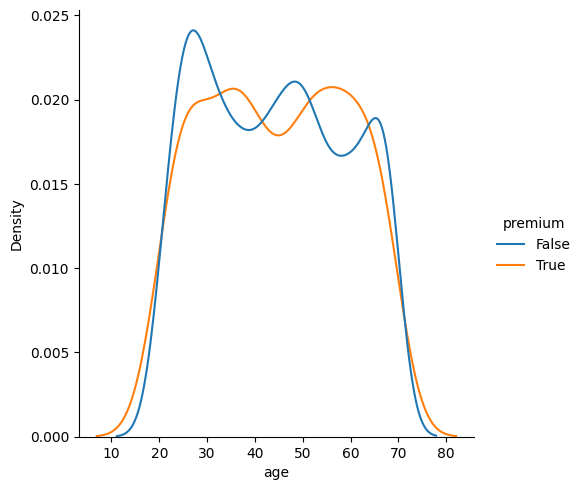

In [56]:
sns.displot(
    data=temp_data,
    x='age',
    hue='premium',  
    kind='kde',     
    common_norm=False  
)

### 6

Постройте график распределения числа успешных операций: 

· x – число успешных операций  
· y – число клиентов, совершивших столько успешных операций  

Выберите подходящие утверждения:
    
· __Несколько клиентов совершили более 40 успешных действий__    
· Бóльшая часть наблюдений сосредоточена в правой части графика  
· Все клиенты совершили не более 5 успешных операций  
· __Бóльшая часть наблюдений сосредоточена в левой части графика__   

In [64]:
count_success = pd.DataFrame({'success' : list(range(0, 42))})
count_success.head()

,success
0,0
1,1
2,2
3,3
4,4


In [84]:
count_success_client = temp_data[temp_data['success'] == True].groupby('client', as_index=False)['success'].count()
count_success_client = count_success.merge(count_success_client, on='success', how='inner')
count_success_client = count_success_client.groupby('success', as_index=False).count().rename(columns={'client' : 'count_client'})
count_success_client

,success,count_client
0,1,2051
1,2,42
2,3,1
3,40,1
4,41,9


<Axes: xlabel='success', ylabel='Count'>

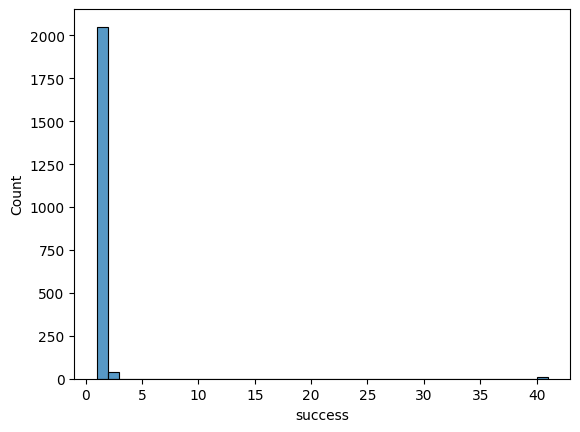

In [96]:
sns.histplot(data = count_success_client, x = 'success', binwidth=1, weights='count_client')

### ★ 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [1]:
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='count'>

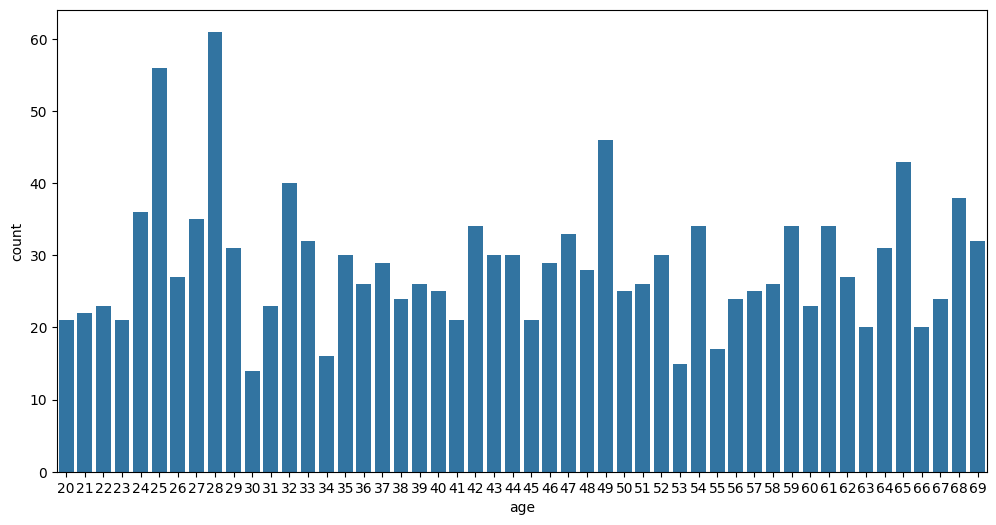

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(data = temp_data[temp_data['success'] == True & (temp_data['platform'] == 'computer')], x = 'age')